In [1]:
import MDAnalysis as mda
from MDAnalysis.analysis.rms import RMSD
from prody import *
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from numpy import *

In [2]:
import seaborn as sns
import pandas as pd

# MSF

In [3]:
def evalDCD(currMutation, currRun):
    currDirectory = './' + currMutation + '/' + currRun + '/'
    structure = parsePDB(currDirectory + 'step3_input.pdb')
    
    ensemble = parseDCD(currDirectory + 'step5_1.dcd')    
    
    ensemble.setAtoms(structure.calpha)
    ensemble.setCoords(structure)
    ensemble.superpose()
    
    rmsds_refFirst = ensemble.getRMSDs()

    # Superpose the ensemble to the center of frame
    ensemble.iterpose()
    msf = ensemble.getMSFs()
    
    return msf, rmsds_refFirst

In [5]:
# all distances
mutations = ['WT_AF'] # , 'N272H_AF']
Runs = ['Run1', 'Run2', 'Run3']

frames = ["{:04}".format(i) for i in range(1, 2001)]

In [6]:
allRMSDs_refFirst = {}
allMSFs = {}


for currMutation in mutations:
    if currMutation not in allRMSDs_refFirst:
        allRMSDs_refFirst[currMutation] = {}
    if currMutation not in allMSFs:
        allMSFs[currMutation] = {}
    
    for run in Runs:
        msf, rmsds_refFirst = evalDCD(currMutation, run)
        allRMSDs_refFirst[currMutation][run] = rmsds_refFirst
        allMSFs[currMutation][run] = msf

@> WARNING parsed 5 digit residue number including numeric insertion code
@> 293661 atoms and 1 coordinate set(s) were parsed in 3.73s.
@> DCD file contains 2000 coordinate sets for 293661 atoms.
@> DCD file was parsed in 70.43 seconds.
@> 6721.52 MB parsed at input rate 95.44 MB/s.
@> 2000 coordinate sets parsed at input rate 28 frame/s.
@> Superposition completed in 39.43 seconds.
@> Starting iterative superposition:
@> Step #1: RMSD difference = 7.8645e+01
@> Step #2: RMSD difference = 3.1952e-01
@> Step #3: RMSD difference = 1.0195e-01
@> Step #4: RMSD difference = 5.2700e-02
@> Step #5: RMSD difference = 2.7178e-02
@> Step #6: RMSD difference = 1.4009e-02
@> Step #7: RMSD difference = 7.2208e-03
@> Step #8: RMSD difference = 3.7221e-03
@> Step #9: RMSD difference = 1.9174e-03
@> Step #10: RMSD difference = 9.8790e-04
@> Step #11: RMSD difference = 5.1022e-04
@> Step #12: RMSD difference = 2.6375e-04
@> Step #13: RMSD difference = 1.3494e-04
@> Step #14: RMSD difference = 7.0269e-0

In [44]:
allMSFs['N272H_AF']['Run3']

array([7.72857055e+01, 5.85762491e+01, 4.32272552e+01, 2.94263303e+01,
       1.67966716e+01, 1.20241759e+01, 1.02767924e+01, 8.48463501e+00,
       7.62823725e+00, 5.71893606e+00, 3.91987445e+00, 3.60449907e+00,
       3.71614793e+00, 2.56094836e+00, 1.81470356e+00, 2.33584862e+00,
       2.17886994e+00, 1.32318596e+00, 1.37892949e+00, 1.99778561e+00,
       1.53578919e+00, 8.10576959e-01, 8.75295138e-01, 8.08144251e-01,
       1.02877990e+00, 7.80263241e-01, 1.01420400e+00, 1.10694614e+00,
       1.67291612e+00, 2.14036317e+00, 3.01583746e+00, 2.40707215e+00,
       1.88263080e+00, 3.09126542e+00, 3.71153671e+00, 2.69994332e+00,
       2.41154721e+00, 2.50316880e+00, 1.79719866e+00, 1.14795621e+00,
       9.53459400e-01, 9.14403439e-01, 8.32555496e-01, 5.80923517e-01,
       5.36206454e-01, 5.67235699e-01, 4.63001418e-01, 3.69285493e-01,
       4.28342759e-01, 4.84814983e-01, 4.21310983e-01, 3.76268450e-01,
       4.99571532e-01, 5.22600766e-01, 4.39125191e-01, 5.13010574e-01,
      

## Crystal structure

In [7]:
def evalDCD_crystal(currMutation, currRun):
    currDirectory = '../CPOX_MD/' + currMutation + '/' + currRun + '/'
    structure = parsePDB(currDirectory + 'step3_input.pdb')
    
    ensemble = parseDCD(currDirectory + 'step5_1.dcd')    
    
    ensemble.setAtoms(structure.calpha)
    ensemble.setCoords(structure)
    ensemble.superpose()
    
    rmsds_refFirst = ensemble.getRMSDs()

    # Superpose the ensemble to the center of frame
    ensemble.iterpose()
    msf = ensemble.getMSFs()
    
    return msf, rmsds_refFirst

In [8]:
# all distances
mutations = ['WT', 'N272H']
Runs = ['Run1', 'Run2', 'Run3', 'Run4', 'Run5']

frames = ["{:04}".format(i) for i in range(1, 1001)]

In [9]:
allRMSDs_refFirst_crystal = {}
allMSFs_crystal = {}


for currMutation in mutations:
    if currMutation not in allRMSDs_refFirst_crystal:
        allRMSDs_refFirst_crystal[currMutation] = {}
    if currMutation not in allMSFs_crystal:
        allMSFs_crystal[currMutation] = {}
    
    for run in Runs:
        msf, rmsds_refFirst = evalDCD_crystal(currMutation, run)
        allRMSDs_refFirst_crystal[currMutation][run] = rmsds_refFirst
        allMSFs_crystal[currMutation][run] = msf

@> WARNING parsed 5 digit residue number including numeric insertion code
@> 175112 atoms and 1 coordinate set(s) were parsed in 1.86s.
@> DCD file contains 500 coordinate sets for 175112 atoms.
@> DCD file was parsed in 6.67 seconds.
@> 1002.04 MB parsed at input rate 150.32 MB/s.
@> 500 coordinate sets parsed at input rate 75 frame/s.
@> Superposition completed in 3.79 seconds.
@> Starting iterative superposition:
@> Step #1: RMSD difference = 6.2178e+01
@> Step #2: RMSD difference = 3.9261e-03
@> Step #3: RMSD difference = 5.1271e-06
@> Iterative superposition completed in 4.18s.
@> WARNING parsed 5 digit residue number including numeric insertion code
@> 175112 atoms and 1 coordinate set(s) were parsed in 1.87s.
@> DCD file contains 500 coordinate sets for 175112 atoms.
@> DCD file was parsed in 6.49 seconds.
@> 1002.04 MB parsed at input rate 154.43 MB/s.
@> 500 coordinate sets parsed at input rate 77 frame/s.
@> Superposition completed in 4.21 seconds.
@> Starting iterative super

In [10]:
allMSFs_crystal['WT']

{'Run1': array([28.31720623, 14.8649762 ,  6.65893131,  4.2488613 ,  2.8238053 ,
         3.34868398,  3.41977012,  2.37322683,  2.34547899,  3.34057778,
         2.62883783,  1.5684921 ,  1.97944563,  1.53361463,  1.49125051,
         1.09762268,  1.15921449,  1.30955276,  2.11199008,  2.2356968 ,
         2.72395624,  1.96567854,  1.46612315,  2.20387342,  2.16610051,
         1.45333678,  1.54584302,  1.47152658,  0.94084006,  0.72208125,
         0.6353071 ,  0.71098982,  0.64564139,  0.4278935 ,  0.45724192,
         0.59278445,  0.46045008,  0.32125628,  0.43676706,  0.52456247,
         0.38414   ,  0.36222137,  0.55864972,  0.5780715 ,  0.46454282,
         0.50729385,  0.67493046,  0.69910774,  0.64315173,  0.84352033,
         1.07509723,  0.87723791,  0.84143833,  1.95812236,  1.5590145 ,
         2.68130978,  1.32251085,  1.02729619,  1.09960584,  1.08658933,
         1.3779364 ,  1.65118744,  2.10542781,  2.88037475,  3.93946513,
         5.97550569,  5.1882632 ,  6.327703

# Plots

In [11]:
MSFs_data = allMSFs_crystal | allMSFs

In [13]:
allMSFs['WT_AF']

{'Run1': array([159.61205796, 128.39795129, 111.02183097, 114.81688565,
        120.74148108, 119.30575575, 142.69871841, 154.88099951,
        164.72007015, 120.03148212, 107.56159907, 137.72139739,
        119.35294946,  82.82953642, 101.0561096 , 119.21301019,
         84.24808906,  73.5943848 , 107.76992389, 102.86331722,
         74.12672505,  94.24309046, 115.46596645, 152.12673879,
        165.86784679, 170.92068162, 219.36032202, 219.94893725,
        240.03108924, 202.98245815, 240.3030632 , 234.24059621,
        178.40708155, 183.85243248, 215.28094571, 175.09442098,
        134.290492  , 109.27625419, 122.0633267 ,  99.49235741,
        130.97174031, 123.51154564,  84.41343001,  93.39306593,
        119.96434222,  90.57482293,  70.4354367 ,  98.93624733,
        101.70347396,  66.39361991,  71.87903494,  99.78632199,
         76.99246926,  56.17209414,  83.33024726,  95.54341285,
         64.41427944,  68.85021423, 103.4972361 ,  91.25941197,
         71.8971823 , 103.852068

In [75]:
# ['allRMSDs_refCenter', 'allRMSDs_refFirst', 'allMSFs', 'allEnsemble']

data = {}
for mutate in ['N272H', 'N272H_AF']:

    list1 = MSFs_data[mutate]['Run1']
    list2 = MSFs_data[mutate]['Run2']

    # Zip the lists together
    zipped_lists = zip(list1, list2)

    # Calculate the average of each group of elements
    average_list = [sum(items) / len(items) for items in zipped_lists]

    if mutate == "N272H_AF":
        data["N272H (AF)"] = average_list
    else:
        data[mutate] = average_list
data.keys()

dict_keys(['N272H', 'N272H (AF)'])

In [17]:
data = {}
for mutate in ['WT', 'WT_AF']:

    if mutate == 'WT':
        list1 = MSFs_data[mutate]['Run1']
        list2 = MSFs_data[mutate]['Run2']
        list3 = MSFs_data[mutate]['Run3']
        list4 = MSFs_data[mutate]['Run4']
        list5 = MSFs_data[mutate]['Run5']
        zipped_lists = zip(list1, list2, list3, list4, list5)
    else:
        # list1 = MSFs_data[mutate]['Run1']
        list2 = MSFs_data[mutate]['Run2']
        list3 = MSFs_data[mutate]['Run3']
        # Zip the lists together
        zipped_lists = zip(list2, list3)

    # Calculate the average of each group of elements
    average_list = [sum(items) / len(items) for items in zipped_lists]

    if mutate == "WT_AF":
        data["WT (AF)"] = average_list
    else:
        data[mutate] = average_list
data.keys()

dict_keys(['WT', 'WT (AF)'])

In [18]:
data['WT (AF)'] = data['WT (AF)'][10:347] + data['WT (AF)'][357:]
len(data['WT (AF)']) == len(data['WT'])

True

In [76]:
data['N272H (AF)'] = data['N272H (AF)'][10:347] + data['N272H (AF)'][357:]
len(data['N272H (AF)']) == len(data['N272H'])

True

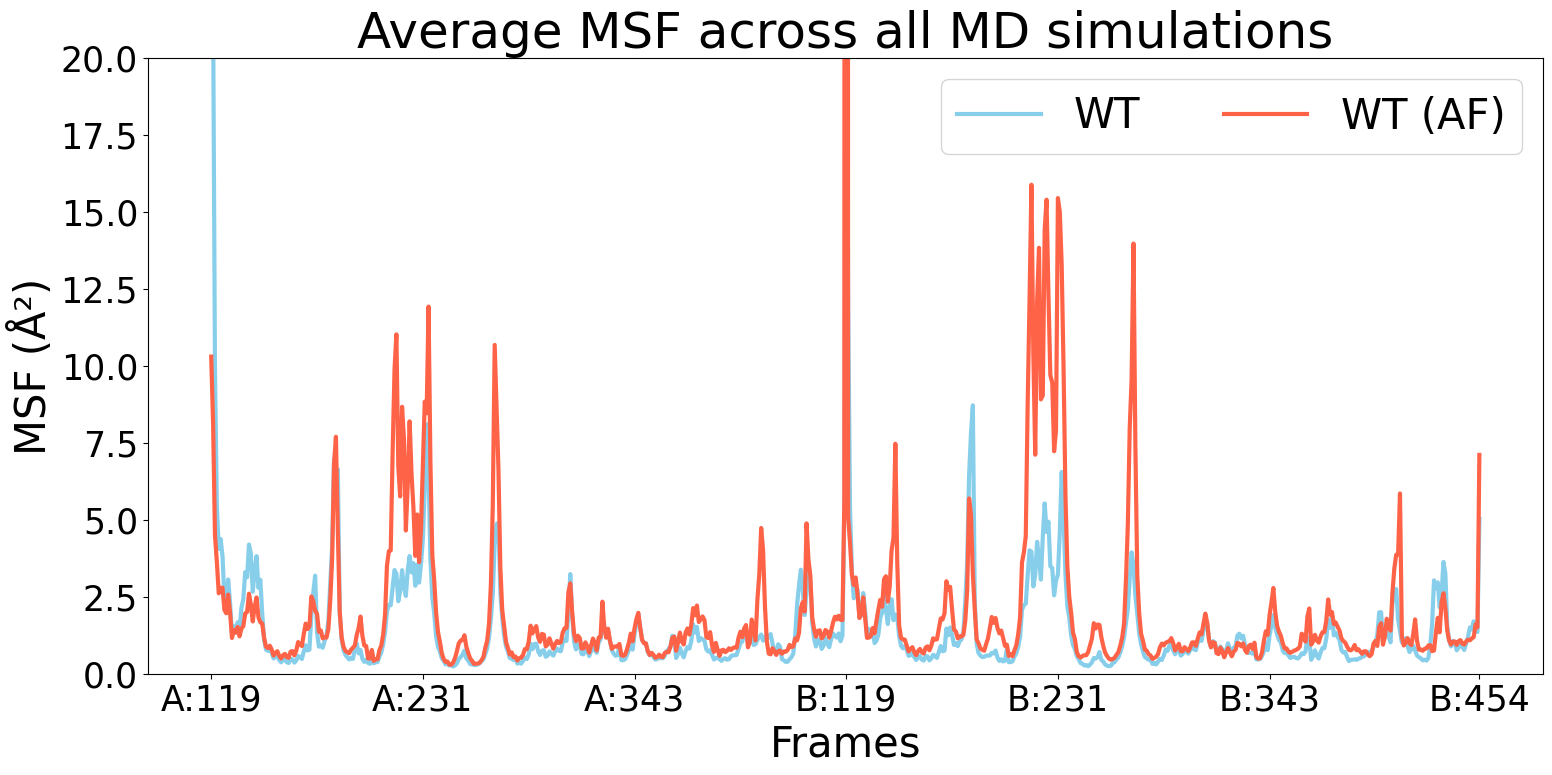

In [31]:
# plot MSFs

# Colors
colors = ['skyblue', 'tomato'] # ['forestgreen', 'magenta', 'orange', 'gold']

plt.figure(figsize=(18, 8))

# Increase font sizes
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)
plt.rcParams.update({'font.size': 30})

for (series, values), color in zip(data.items(), colors):
    plt.plot(values, linewidth=3, label=series, color=color)


plt.ylim(0, 20)
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.03), shadow=True, ncol=4)
plt.legend(ncol=4)

plt.title('Average MSF across all MD simulations' )
plt.xlabel('Frames')
plt.ylabel('MSF (Å²)')

Labels = ['A:119', 'A:231', 'A:343', 'B:119', 'B:231', 'B:343', 'B:454']
Segment = 112
plt.xticks([0, Segment, Segment*2, Segment*3, Segment*4, Segment*5, len(values) - 1], Labels)
plt.savefig('WT_comparison.png', bbox_inches='tight',dpi=600)
# plt.show()


In [32]:
!xdg-open .